<a href="https://colab.research.google.com/github/carolina-garay/M_Espacios_Verdes_2022_Grupo1/blob/Garay_Carolina_TP1/Analisis_y_Visualizacion_MEV_TP_Garay_v4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Setup
!pip install pandas_profiling==2.8.0
!pip install pandas==1.2.0

# Mentoría: Monitoreo de Espacios Verdes -- Práctico de análisis y visualización

__DIPLODATOS 2022 - FAMAF UNC__

_GRUPO1_

Alumnos

- Artola, María Fernanda
- Garay, Carolina
- Nievas, Rafael
- Ormaechea, Sebastián


## Introducción
El empleo de imágenes satelitales se puede utilizar para determinar diversos índices de plantas tales como el área de clorofila de las hojas y los índices de contenido de agua. Esto es especialmente importante para la predicción del rendimiento efectivo y las aplicaciones relacionadas con la vegetación sobre la superficie terrestre. Particularmente podríamos establecer cuánta agua necesita una plaza, o parque, cada cierto tiempo por ejemplo. Es de particular interés determinar el crecimineto en altura del pasto de un parque y así un municipio podría establecer cuándo enviar su cuadrilla a cortarlo.

##Carga del dataset

In [2]:
# from link @ https://github.com/felixlapalma/monitoreo-espacios-verdes-diplo202X/blob/main/data/ab-initio-dataset-build.md
!gdown https://drive.google.com/file/d/1tgbIQaEXzIghcFYyd2YM9iMho4TDHHFd/view?usp=sharing --fuzzy

Downloading...
From: https://drive.google.com/uc?id=1tgbIQaEXzIghcFYyd2YM9iMho4TDHHFd
To: /content/espacios-verdes-indexs-cba-20170101-20220420.zip
100% 170M/170M [00:01<00:00, 98.7MB/s]


In [35]:
# Importación del módulo para ejecutar pandas profiling y descargar reporte
from pandas_profiling import ProfileReport
#from google.colab import files

In [3]:
import pandas as pd
import numpy as np

In [4]:
df=pd.read_csv('/content/espacios-verdes-indexs-cba-20170101-20220420.zip',index_col=0)


##Primera visualización del conjunto de datos.

In [38]:
print(f"Dataframe HEAD")
display(df.head())


Dataframe HEAD


,B02_min,B02_max,B02_mean,B02_median,B02_nodata,B02_range,B02_count,B03_min,B03_max,B03_mean,...,sipi_median,sipi_nodata,sipi_range,sipi_count,raster,clouds_on_raster,osm_id,name,area_m2,date
0,0.0871,0.1421,0.102570,0.09650,0.0,0.0550,47,0.0768,0.1516,0.098885,...,0.884216,0.0,0.453065,47,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,605976736,NaN,4650.710032,2017-01-03
1,0.0970,0.1936,0.118354,0.10660,0.0,0.0966,13,0.1006,0.1949,0.122154,...,0.971875,0.0,0.247045,13,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,559322368,NaN,1502.000513,2017-01-03
2,0.0992,0.1273,0.111805,0.11290,0.0,0.0281,19,0.1037,0.1369,0.117795,...,0.973017,0.0,0.207006,19,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,559322369,NaN,2004.192528,2017-01-03
3,0.0995,0.1933,0.118491,0.11355,0.0,0.0938,66,0.0993,0.1990,0.124512,...,0.966202,0.0,0.258424,66,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,559328111,NaN,6940.507640,2017-01-03
4,0.1059,0.1385,0.122453,0.12240,0.0,0.0326,47,0.1036,0.1580,0.132455,...,0.993986,0.0,0.260419,47,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,559328112,NaN,4587.356048,2017-01-03


In [7]:
print(f"Dataframe TAIL")
df.tail()

Dataframe TAIL


,B02_min,B02_max,B02_mean,B02_median,B02_nodata,B02_range,B02_count,B03_min,B03_max,B03_mean,...,sipi_median,sipi_nodata,sipi_range,sipi_count,raster,clouds_on_raster,osm_id,name,area_m2,date
208927,0.0990,0.1684,0.115990,0.11270,0.0,0.0694,31,0.0862,0.1627,0.107387,...,0.892669,0.0,0.545993,31,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.0,307532496,NaN,3824.467794,2022-04-17
208928,0.1145,0.3240,0.149746,0.13665,0.0,0.2095,80,0.0977,0.3363,0.149332,...,1.084102,0.0,2.805242,80,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.0,307535460,Plaza Exodo Jujeño,7184.535857,2022-04-17
208929,0.0993,0.1388,0.110870,0.10625,0.0,0.0395,10,0.0930,0.1473,0.106160,...,0.914887,0.0,0.199024,10,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.0,307796387,NaN,1147.997645,2022-04-17
208930,0.0991,0.1407,0.124008,0.12570,0.0,0.0416,53,0.0852,0.1377,0.118574,...,0.991200,0.0,0.299910,53,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.0,307097955,NaN,5185.690046,2022-04-17
208931,0.0874,0.1347,0.104697,0.10180,0.0,0.0473,95,0.0707,0.1321,0.095941,...,0.889747,0.0,0.456241,95,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.0,901791744,NaN,9394.381202,2022-04-17


In [8]:
#profile = ProfileReport(df_)
#profile

In [9]:
# Obtenemos los tipos de datos por cada columna
data_types = df.dtypes
data_types = pd.DataFrame(data_types)
data_types = data_types.rename(columns = {0:'ReadingDataType'})
data_types.index.names = ['FieldName']
data_types

,ReadingDataType
FieldName,
B02_min,float64
B02_max,float64
B02_mean,float64
B02_median,float64
B02_nodata,float64
...,...
clouds_on_raster,float64
osm_id,int64
name,object


##Variables de interés

Seleccionamos las siguientes variables:


- osm_id: Identificador asociado a la capa original (atlas-espacios-verdes).
- date: Fecha de la muestra.
- B03_median: Mediana correspondiente a la Banda 03 (color verde). 
- ndvi_max: Valor máximo correspondiente al indice NDVI.
- area_m2: Área en metros cuadrados

¿Qué _tipo de variable_ es cada una? Parecen estar acotadas? ¿Son fisicamente razonables?


In [39]:
df[["osm_id","B03_median","date","ndvi_max","area_m2"]].dtypes

osm_id          int64
B03_median    float64
date           object
ndvi_max      float64
area_m2       float64
dtype: object

## Análisis estádistico de las variables de interés

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
BANDS = ["B02", "B03", "B04", "B05", "B06", "B07", "B8A", "B08", "B11", "B12"]
TEST_COLS=[f"{B}_median" for B in BANDS]
df_bandas=df.loc[:,TEST_COLS]

***Outliers***: ¿Existen _outliers_ en las variables seleccionadas? (Note que en la presentación de los datos, esto parece estar presente en casi todos los casos) 

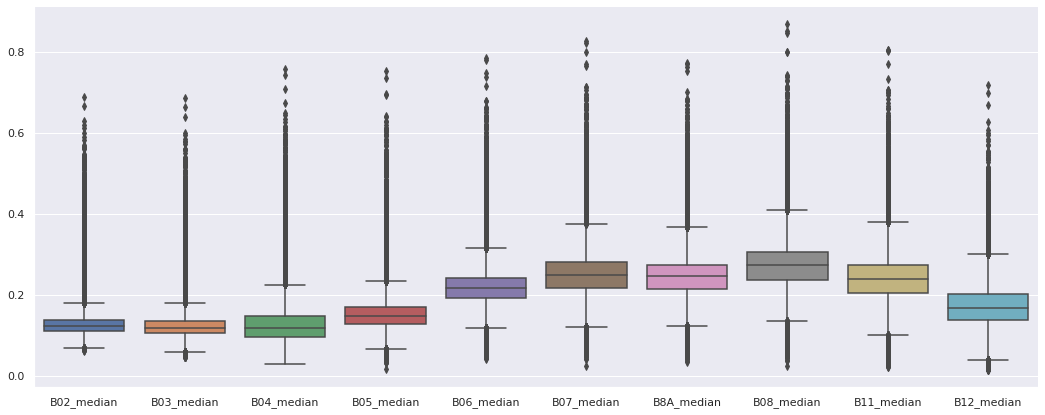

In [8]:
# Visualizamos los outliers
plt.figure(figsize=(18,7))
sns.set(font_scale = 1)
g = sns.boxplot(data=df_bandas)                  
sns.despine()

Estudiamos los outliers de la variable **area_m2**

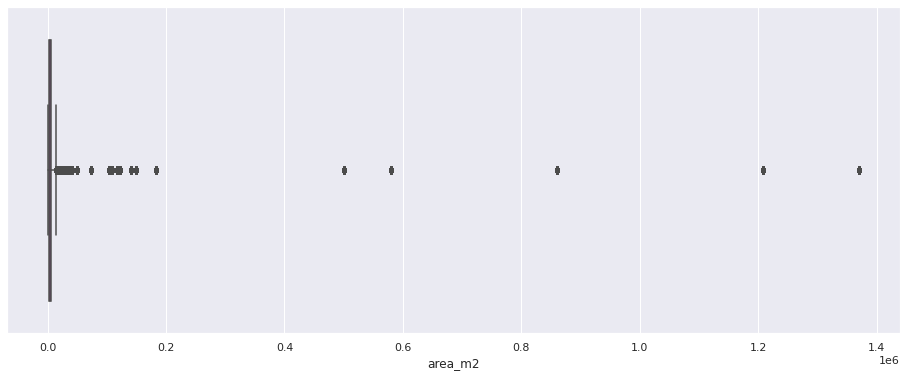

In [9]:
plt.figure(figsize=(16, 6))
sns.boxplot(x=df["area_m2"], color='magenta');


Dado que la visualización de los outliers se dificulta en el boxplot, decidimos utilizar un histograma para la visualización.

<Figure size 1440x576 with 0 Axes>

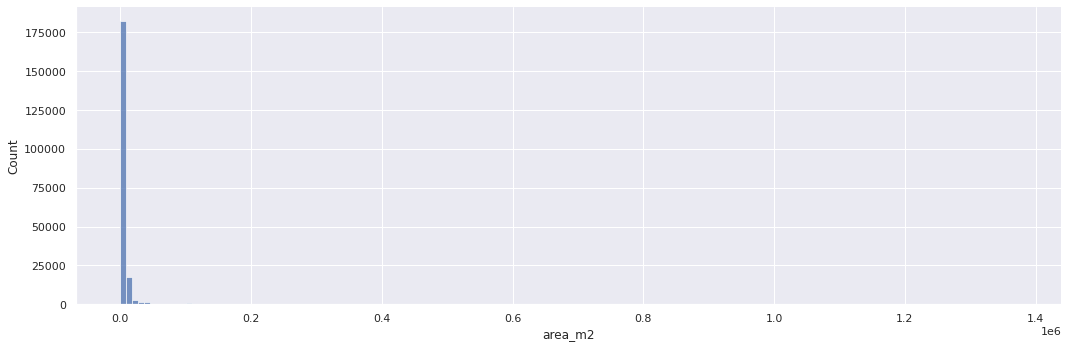

In [10]:
plt.figure(figsize=(20,8))
m=sns.displot(df["area_m2"], aspect=3, bins=150)
plt.show();

En el histograma también se dificulta la visualización de los valores de la variable **area_m2**, por lo tanto calculamos medidas de tendencia central.

In [11]:
df["area_m2"].describe().apply(lambda s: '{0:.2f}'.format(s))

count     208932.00
mean       12493.88
std        78957.30
min          422.60
25%         2066.56
50%         3812.18
75%         6644.79
max      1370630.49
Name: area_m2, dtype: object

**Valores Faltantes**: ¿Existen? ¿Es mejor descartarlos o completarlos con un valor particular? (Quizas le sirva responder la siguiente pregunta en primer lugar)

In [ ]:
# Análisis estadístico de bandas mediante pandas profiling
profileBandas = ProfileReport(df_bandas)
profileBandas
#files.download('df_BandasReport.html')

In [ ]:
# Análisis de las variables seleccionadas mediante pandas profiling
df_Vars=df.loc[:,["B03_median", "osm_id", "date", "ndvi_max","area_m2"]]
profileVars = ProfileReport(df_Vars)
profileVars 

#files.download('df_VarsReport.html')

Distribucion de Valores: ¿Cómo es la distribución de las variables en el dataset? ¿Se parecen a alguna distribucion que recuerde? Son todas de la misma distribución?

<Figure size 1440x576 with 0 Axes>

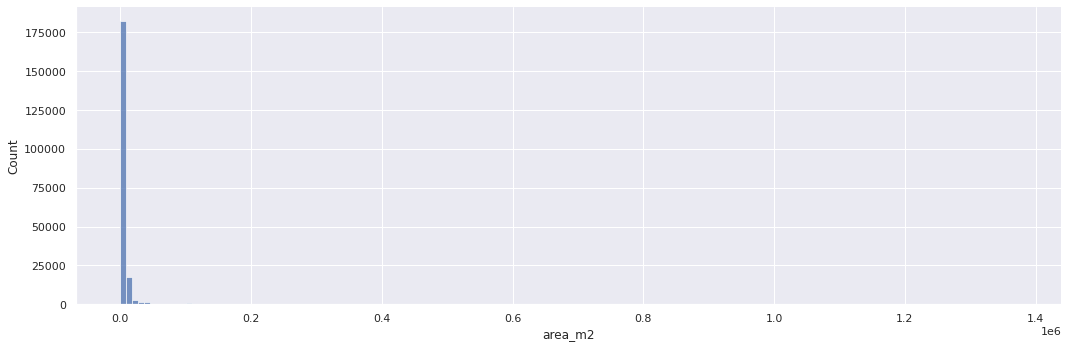

In [14]:
# Gráfica de la distribución de la variable area_m2
plt.figure(figsize=(20,8))
m=sns.displot(df["area_m2"], aspect=3, bins=150)
plt.show();

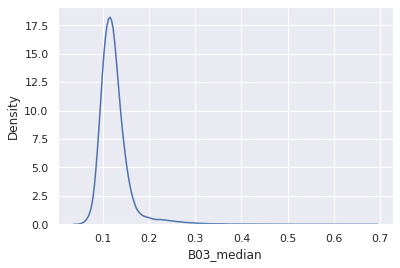

In [15]:
# Gráfica de la distribución de la variable B03_median
sns.kdeplot(df['B03_median']);

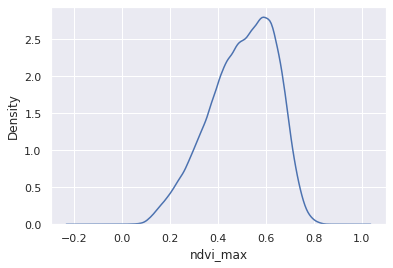

In [17]:
# Gráfica de la distribución de la variable ndvi_max
sns.kdeplot(df['ndvi_max'])

**Distribucion Condicionada**: ¿Cómo es la distribución de una variable (cualquiera que haya elegido) condicionada a la variable temporal por ejemplo? ¿Tiene sentido utilizar la dependencia temporal cuando estamos intentando completar valores faltantes?

In [18]:
# Convertimos la columna de fecha de tipo object a datetime
from datetime import date
from datetime import datetime
df['date'] = pd.to_datetime(df['date'])
df[["B03_median", "osm_id", "date", "ndvi_max","area_m2"]].dtypes

B03_median           float64
osm_id                 int64
date          datetime64[ns]
ndvi_max             float64
area_m2              float64
dtype: object

In [19]:
df['date'].index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            208922, 208923, 208924, 208925, 208926, 208927, 208928, 208929,
            208930, 208931],
           dtype='int64', length=208932)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


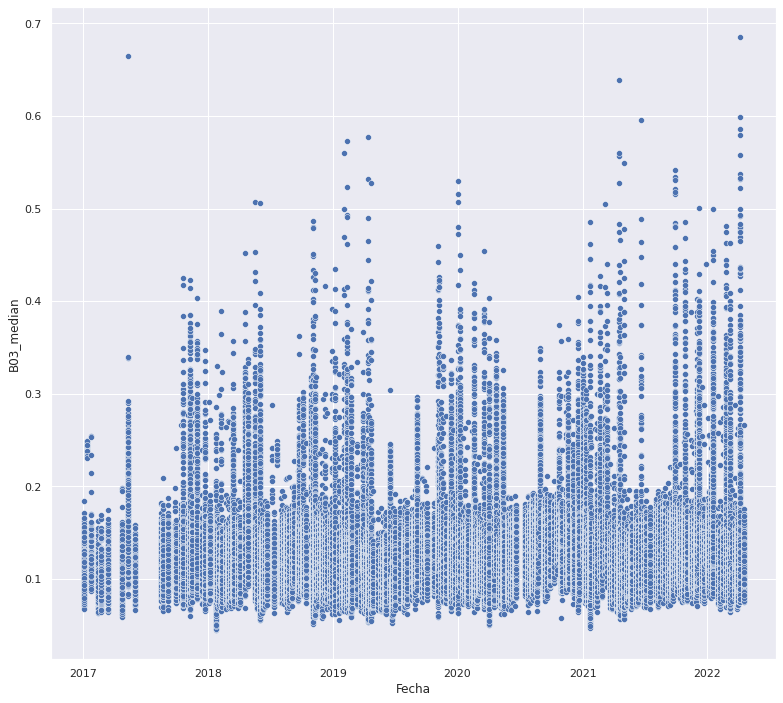

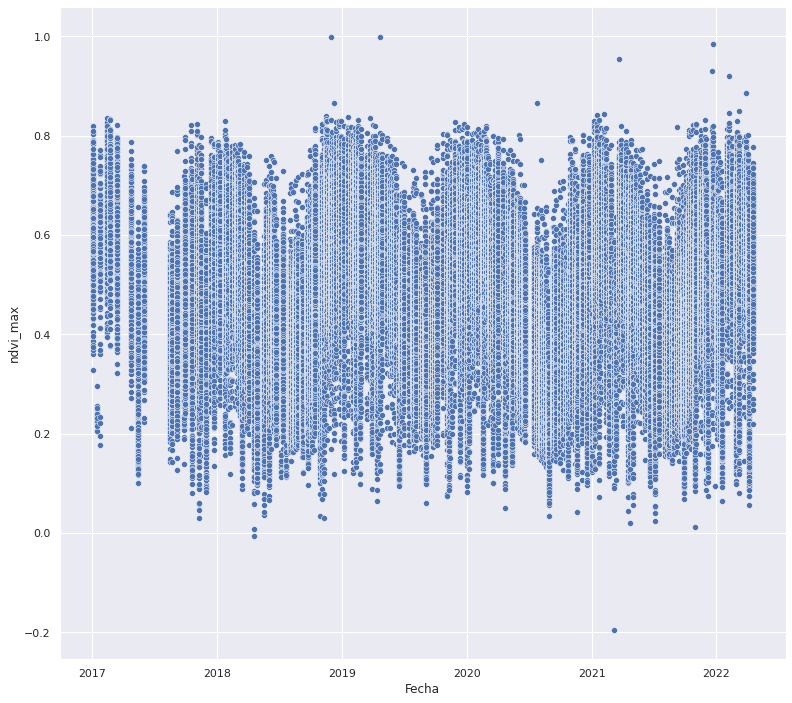

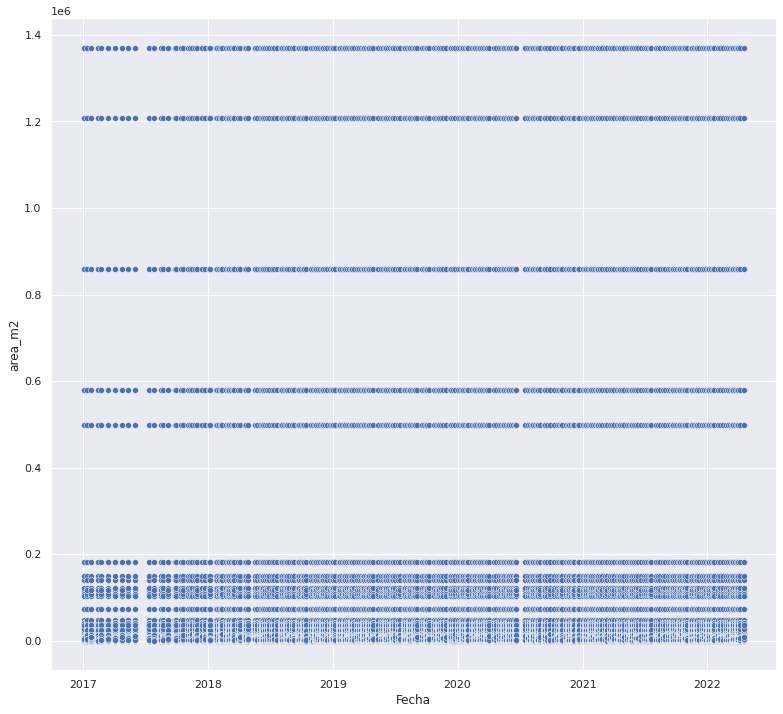

In [20]:
# Graficamos las variables seleccionadas en función del tiempo
plt.figure(figsize=(13, 12))
sns.scatterplot(df['date'], df['B03_median'])
plt.xlabel("Fecha")
plt.ylabel("B03_median")

plt.figure(figsize=(13, 12))
sns.scatterplot(df['date'], df['ndvi_max'])
plt.xlabel("Fecha")
plt.ylabel("ndvi_max")

plt.figure(figsize=(13, 12))
sns.scatterplot(df['date'], df['area_m2'])
plt.xlabel("Fecha")
plt.ylabel("area_m2");

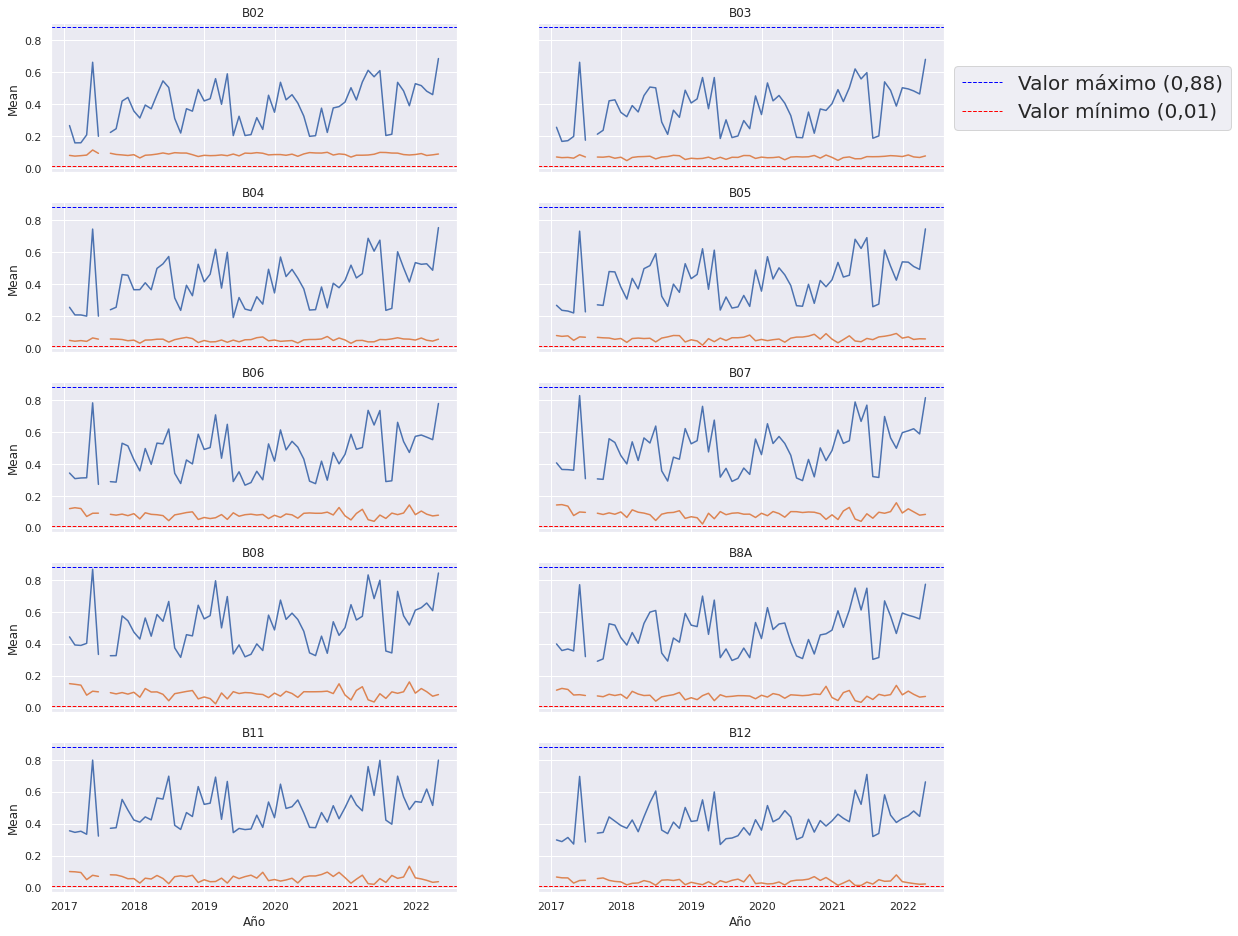

In [21]:
# Graficamos la dispersión de cada una de las bandas a lo largo del tiempo agrupando por mes (freq='M'). 
# Para facilitar la comparación se grafican todas las bandas en un mismo plot y se mantienen las escalas de ambos ejes
# Para facilitar la observación de la dispersión de valores, se grafican líneas segmentada para el valor máximo y mínimo observado  
MeanB02= df.groupby(pd.Grouper(key='date',freq='M')).B02_mean.agg([max, min])
MeanB03= df.groupby(pd.Grouper(key='date',freq='M')).B03_mean.agg([max, min])
MeanB04= df.groupby(pd.Grouper(key='date',freq='M')).B04_mean.agg([max, min])
MeanB05= df.groupby(pd.Grouper(key='date',freq='M')).B05_mean.agg([max, min])
MeanB06= df.groupby(pd.Grouper(key='date',freq='M')).B06_mean.agg([max, min])
MeanB07= df.groupby(pd.Grouper(key='date',freq='M')).B07_mean.agg([max, min])
MeanB08= df.groupby(pd.Grouper(key='date',freq='M')).B08_mean.agg([max, min])
MeanB8A= df.groupby(pd.Grouper(key='date',freq='M')).B8A_mean.agg([max, min])
MeanB11= df.groupby(pd.Grouper(key='date',freq='M')).B11_mean.agg([max, min])
MeanB12= df.groupby(pd.Grouper(key='date',freq='M')).B12_mean.agg([max, min])
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(16, 16), sharex=True, sharey=True)
ax[0, 0].plot(MeanB02)
ax[0, 1].plot(MeanB03)
ax[1, 0].plot(MeanB04)
ax[1, 1].plot(MeanB05)
ax[2, 0].plot(MeanB06)
ax[2, 1].plot(MeanB07)
ax[3, 0].plot(MeanB08)
ax[3, 1].plot(MeanB8A)
ax[4, 0].plot(MeanB11)
ax[4, 1].plot(MeanB12)
ax[0, 0].set_title("B02")
ax[0, 1].set_title("B03")
ax[1, 0].set_title("B04")
ax[1, 1].set_title("B05")
ax[2, 0].set_title("B06")
ax[2, 1].set_title("B07")
ax[3, 0].set_title("B08")
ax[3, 1].set_title("B8A")
ax[4, 0].set_title("B11")
ax[4, 1].set_title("B12")
ax[4, 0].set_xlabel("Año")
ax[4, 1].set_xlabel("Año")
ax[0, 0].set_ylabel("Mean")
ax[1, 0].set_ylabel("Mean")
ax[2, 0].set_ylabel("Mean")
ax[3, 0].set_ylabel("Mean")
ax[4, 0].set_ylabel("Mean")
ax[0, 0].axhline(y=0.88, color='blue', linestyle='--', linewidth=1)
ax[0, 0].axhline(y=0.01, color='red', linestyle='--', linewidth=1)
ax[0, 1].axhline(y=0.88, color='blue', linestyle='--', linewidth=1, label="Valor máximo (0,88)")
ax[0, 1].axhline(y=0.01, color='red', linestyle='--', linewidth=1, label="Valor mínimo (0,01)")
ax[1, 0].axhline(y=0.88, color='blue', linestyle='--', linewidth=1)
ax[1, 0].axhline(y=0.01, color='red', linestyle='--', linewidth=1)
ax[1, 1].axhline(y=0.88, color='blue', linestyle='--', linewidth=1)
ax[1, 1].axhline(y=0.01, color='red', linestyle='--', linewidth=1)
ax[2, 0].axhline(y=0.88, color='blue', linestyle='--', linewidth=1)
ax[2, 0].axhline(y=0.01, color='red', linestyle='--', linewidth=1)
ax[2, 1].axhline(y=0.88, color='blue', linestyle='--', linewidth=1)
ax[2, 1].axhline(y=0.01, color='red', linestyle='--', linewidth=1)
ax[3, 0].axhline(y=0.88, color='blue', linestyle='--', linewidth=1)
ax[3, 0].axhline(y=0.01, color='red', linestyle='--', linewidth=1)
ax[3, 1].axhline(y=0.88, color='blue', linestyle='--', linewidth=1)
ax[3, 1].axhline(y=0.01, color='red', linestyle='--', linewidth=1)
ax[4, 0].axhline(y=0.88, color='blue', linestyle='--', linewidth=1)
ax[4, 0].axhline(y=0.01, color='red', linestyle='--', linewidth=1)
ax[4, 1].axhline(y=0.88, color='blue', linestyle='--', linewidth=1)
ax[4, 1].axhline(y=0.01, color='red', linestyle='--', linewidth=1)
ax[0,1].legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=20)

##Series temporales
Como las observaciones se encuentran indexadas en el tiempo, este tipo de datos se conocen como **series de tiempo**. Elija alguno de los espacios verdes mas conocidos (Parque Sarmiento por ejemplo) y responda: 

- ¿Cual es el período de tiempo bajo análisis?

In [22]:
print(df[df['name'] == 'Parque Sarmiento']['date'].min())
print(df[df['name'] == 'Parque Sarmiento']['date'].max())
Inicio = df[df['name'] == 'Parque Sarmiento']['date'].min()
Final = df[df['name'] == 'Parque Sarmiento']['date'].max()
print('El período de tiempo bajo análisis es de', str(Final - Inicio))

2017-01-03 00:00:00
2022-04-17 00:00:00
El período de tiempo bajo análisis es de 1930 days 00:00:00


- Elija una banda y un indice (B02 y NDVI, por ejemplo) ambos parecen seguir alguna estacionalidad? Es decir, sus valores parecen "repetirse" cada cierto periodo? (Para este analisis considere utilizar la mediana de todas las mediciones {}_median).

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


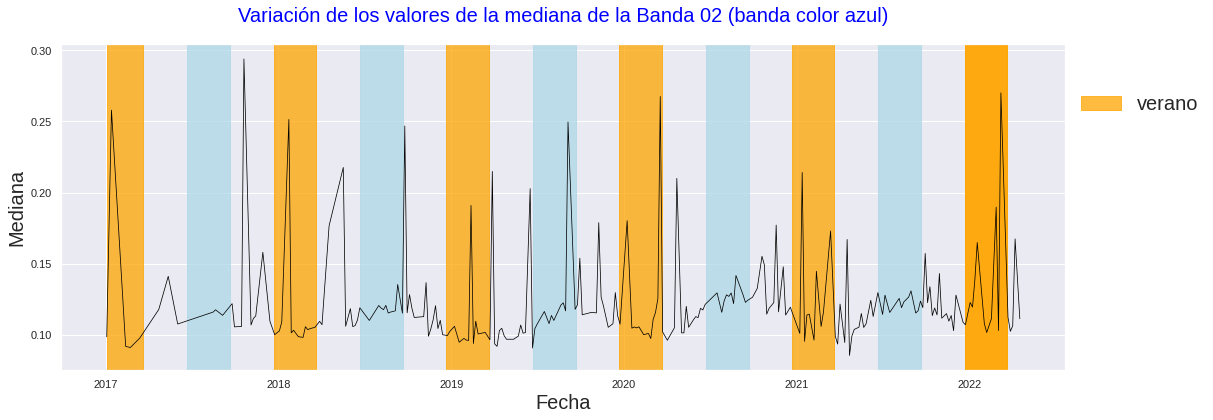

In [23]:
Sarmiento = df[df['name'] == 'Parque Sarmiento']
import matplotlib.dates as mdates # Esto sirve para manipular fechas en los gráficos
import datetime
fig, ax = plt.subplots(figsize=(18,6))
sns.lineplot(Sarmiento['date'], Sarmiento['B02_median'], color="black", linewidth=0.75)
yearlist = ['2017','2018','2019','2020','2021','2022']

for i in range(len(yearlist)):
  if yearlist[i] == '2017':
    ax.axvspan(mdates.date2num(datetime.datetime(2017,1,3)), mdates.date2num(datetime.datetime(2017,3,21)), 
               color="orange",label="verano", alpha=0.75)
  if yearlist[i] == '2022':
    ax.axvspan(mdates.date2num(datetime.datetime(2021,12,22)), mdates.date2num(datetime.datetime(2022,3,21)), 
               color="orange", alpha=0.75)
  else:
     ax.axvspan(mdates.date2num(datetime.datetime(int(yearlist[i]),12,22)), mdates.date2num(datetime.datetime(int(yearlist[i+1]),3,21))
           , color="orange", alpha=0.75)
     ax.axvspan(mdates.date2num(datetime.datetime(int(yearlist[i]),6,22)), mdates.date2num(datetime.datetime(int(yearlist[i]),9,21)), 
            color="lightblue", alpha=0.75) 

plt.xlabel("Fecha", fontsize= 20)
plt.ylabel("Mediana", fontsize= 20)
plt.title("Variación de los valores de la mediana de la Banda 02 (banda color azul)", fontsize= 20, color="blue", position=(0.5, 1.05))
plt.tight_layout
plt.style.use('seaborn-whitegrid')  
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 0.9), fontsize=20);

  **PARA LA GRÁFICA ANTERIOR ME FALTARÍA AGREGAR LEYENDA "INVIERNO"**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


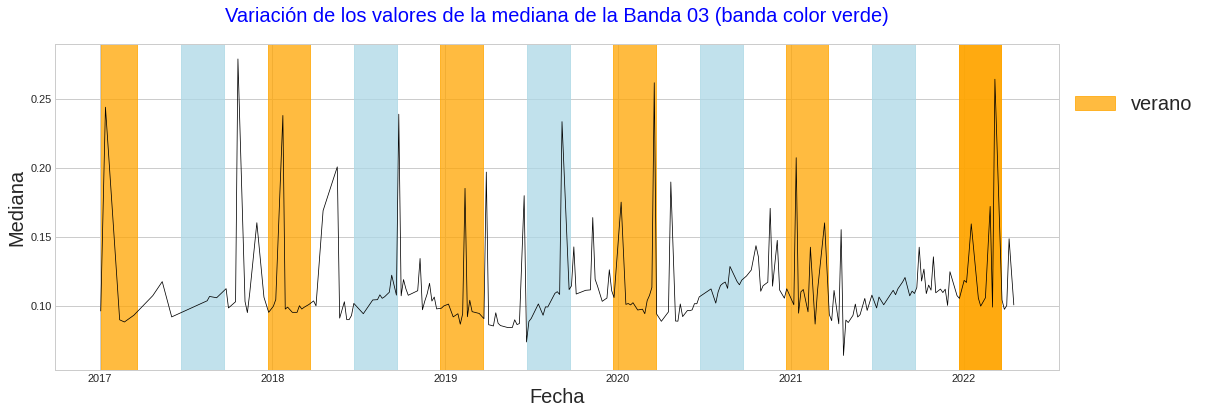

In [24]:
fig, ax = plt.subplots(figsize=(18,6))
sns.lineplot(Sarmiento['date'], Sarmiento['B03_median'], color="black", linewidth=0.75)
yearlist = ['2017','2018','2019','2020','2021','2022']

for i in range(len(yearlist)):
  if yearlist[i] == '2017':
    ax.axvspan(mdates.date2num(datetime.datetime(2017,1,3)), mdates.date2num(datetime.datetime(2017,3,21)), 
               color="orange",label="verano", alpha=0.75)
  if yearlist[i] == '2022':
    ax.axvspan(mdates.date2num(datetime.datetime(2021,12,22)), mdates.date2num(datetime.datetime(2022,3,21)), 
               color="orange", alpha=0.75)
  else:
     ax.axvspan(mdates.date2num(datetime.datetime(int(yearlist[i]),12,22)), mdates.date2num(datetime.datetime(int(yearlist[i+1]),3,21))
           , color="orange", alpha=0.75)
     ax.axvspan(mdates.date2num(datetime.datetime(int(yearlist[i]),6,22)), mdates.date2num(datetime.datetime(int(yearlist[i]),9,21)), 
            color="lightblue", alpha=0.75) 

plt.xlabel("Fecha", fontsize= 20)
plt.ylabel("Mediana", fontsize= 20)
plt.title("Variación de los valores de la mediana de la Banda 03 (banda color verde)", fontsize= 20, color="blue", position=(0.5, 1.05))
plt.tight_layout
plt.style.use('seaborn-whitegrid')  
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 0.9), fontsize=20);

- Seleccione un índice y grafique un boxplot para cada año. ¿Se mantiene inalterada en el tiempo la distribución? Que pasa si ese boxplot lo separa por estación (invierno,verano,otoño, primavera) y año son parecidas entre ellas en algun caso? Como se comportan año a año?

In [25]:
# Creamos columnas específicas para año, mes y día
df_interest = df[["date", "ndvi_max"]]
df_interest['year'] = df_interest['date'].dt.year
df_interest['month'] = df_interest['date'].dt.month
df_interest['day'] = df_interest['date'].dt.day
Month = df_interest['month']
Day= df_interest['day']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [26]:
Seasons = []
for month, day in zip(Month, Day):
  if month in (1, 2, 3):
	  season = 'summer'
  elif month in (4, 5, 6):
	  season = 'autumn'
  elif month in (7, 8, 9):
	  season = 'winter'
  else:
	  season = 'spring'

  if (month == 3) and (day > 20):
	  season = 'autumn'
  elif (month == 6) and (day > 20):
	  season = 'winter'
  elif (month == 9) and (day > 20):
	  season = 'spring'
  elif (month == 12) and (day > 20):
	  season = 'summer'
  Seasons.append(season)
df_interest['season']= Seasons

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


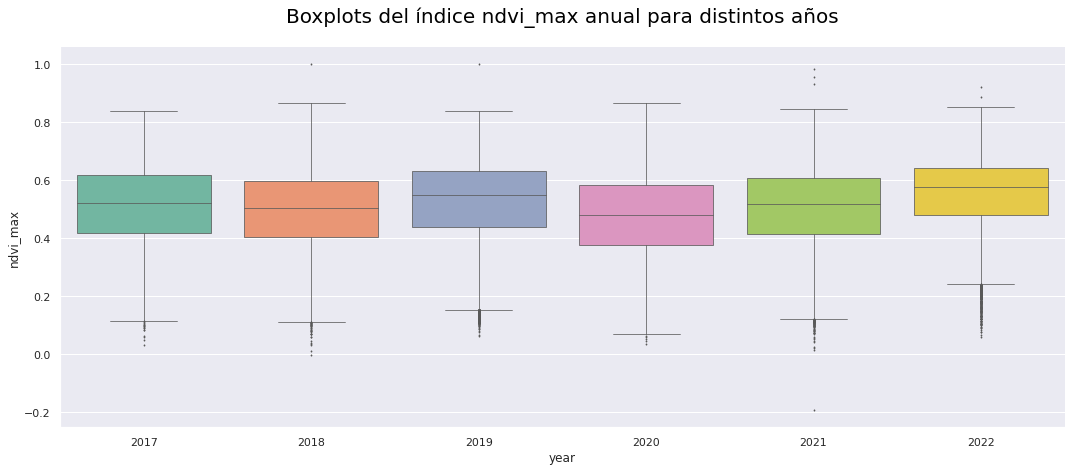

In [27]:
# Visualización de boxplots para cada año
plt.figure(figsize=(18,7))
sns.set(font_scale = 1)
g = sns.boxplot(x="year", y="ndvi_max", data=df_interest, palette="Set2", fliersize=1, whis=1.5, linewidth=0.75)                 
plt.title("Boxplots del índice ndvi_max anual para distintos años", fontsize= 20, color="black", position=(0.5, 1.05))
sns.despine() 


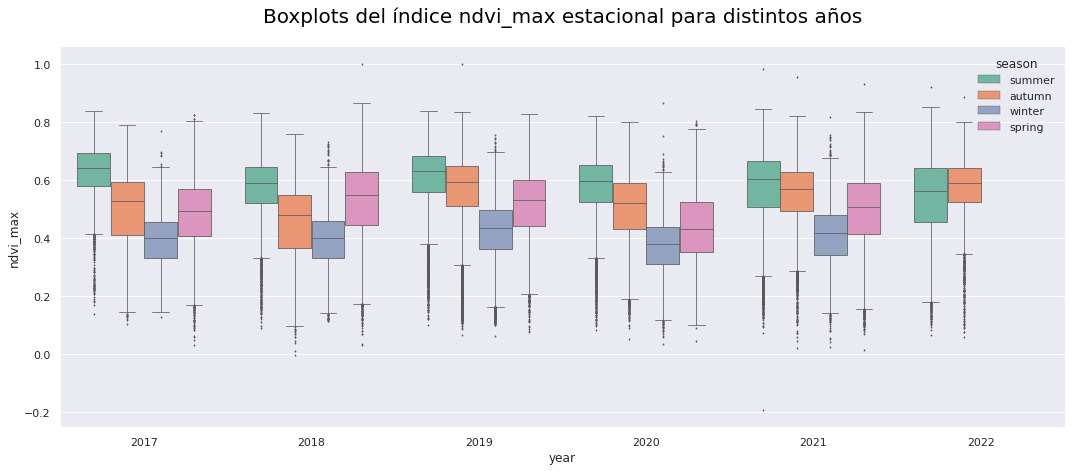

In [28]:
# Visualización de boxplots para cada año con sus estaciones
plt.figure(figsize=(18,7))
sns.set(font_scale = 1)
g = sns.boxplot(x="year", y="ndvi_max", hue="season", data=df_interest, palette="Set2", fliersize=1, whis=1.5, linewidth=0.75)                 
plt.title("Boxplots del índice ndvi_max estacional para distintos años", fontsize= 20, color="black", position=(0.5, 1.05))
sns.despine() 


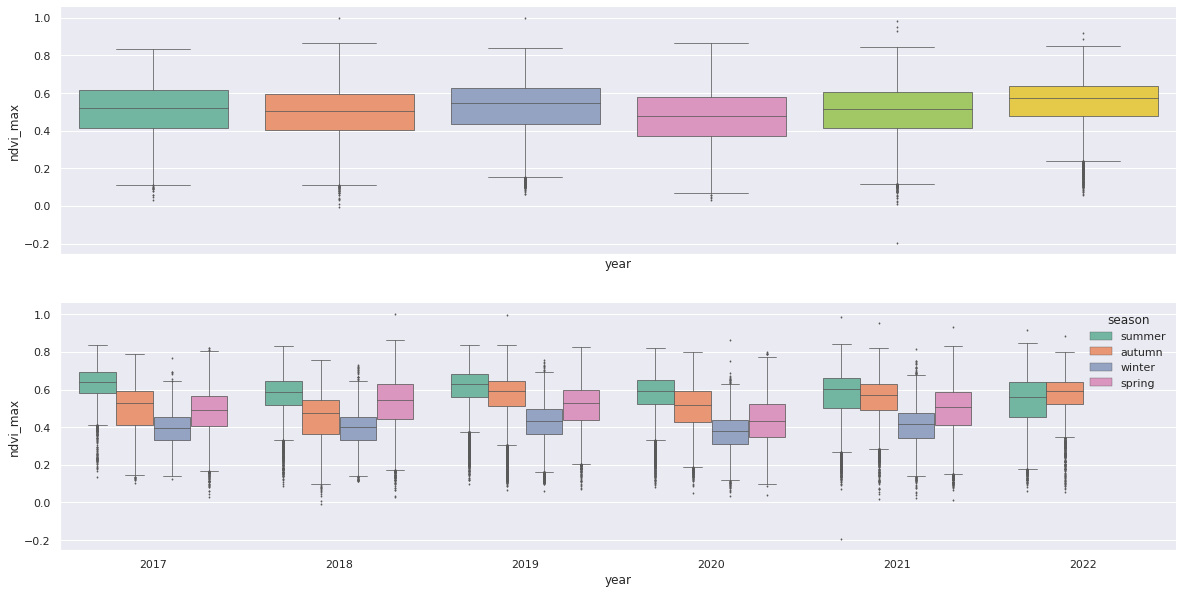

In [29]:
# Seleccionamos algunas bandas representativas (B02, B06 y B11) descartando las que tienen alta correlación
fig, axes = plt.subplots(2, 1, figsize=(20,10), sharex=True, sharey= True)
sns.boxplot(ax=axes[0], x="year", y="ndvi_max",
                 data=df_interest, palette="Set2", fliersize=1, whis=1.5, linewidth=0.75)
sns.boxplot(ax=axes[1], x="year", y="ndvi_max", hue="season",
                 data=df_interest, palette="Set2", fliersize=1, whis=1.5, linewidth=0.75)

sns.despine()

**CONSENSUAR CON SEBA: DECIDIR SI GRÁFICAS POR SEPARADO O JUNTAS**


---


Al analizar el boxplot del índice ndvi_max por año, es posible obervar que la distribución no cambia a lo largo de los años considerados. Sin embargo cuando los datos se separan por estación se observa una marcada variabilidad. Este comportamiento variable sugiere estacionalidad. 


---



- Tiene sentido calcular outliers para todo el tiempo de la serie o deberia segmentarse? Es decir, un outlier en otoño es lo mismo que en primavera o verano?

Para responder esta pregunta haremos un análisis de los outliers de la variable estudiada en el item anterior

In [83]:
df_2017=  df_interest[(df_interest['year'] == 2017)]
df_2017_summer=  df_interest[(df_interest['year'] == 2017) & (df_interest['season'] == "summer")]
df_2017_autumn=  df_interest[(df_interest['year'] == 2017) & (df_interest['season'] == "autumn")]
df_2017_winter=  df_interest[(df_interest['year'] == 2017) & (df_interest['season'] == "winter")]
df_2017_spring=  df_interest[(df_interest['year'] == 2017) & (df_interest['season'] == "spring")]

df_2018=  df_interest[(df_interest['year'] == 2018)]
df_2018_summer=  df_interest[(df_interest['year'] == 2018) & (df_interest['season'] == "summer")]
df_2018_autumn=  df_interest[(df_interest['year'] == 2018) & (df_interest['season'] == "autumn")]
df_2018_winter=  df_interest[(df_interest['year'] == 2018) & (df_interest['season'] == "winter")]
df_2018_spring=  df_interest[(df_interest['year'] == 2018) & (df_interest['season'] == "spring")]



In [92]:
#calculamos rango intercuartil para determinar analíticamente los outliers
#Años 2017 y 2018
q1 = df_2017['ndvi_max'].quantile(0.25)
q3 = df_2017['ndvi_max'].quantile(0.75)
iqr = q3 - q1 #Interquartile range
ls_2017 = q3 + 1.5 * iqr
q1 = df_2017_summer['ndvi_max'].quantile(0.25)
q3 = df_2017_summer['ndvi_max'].quantile(0.75)
iqr = q3 - q1 #Interquartile range
ls_2017_summer = q3 + 1.5 * iqr
q1 = df_2017_autumn['ndvi_max'].quantile(0.25)
q3 = df_2017_autumn['ndvi_max'].quantile(0.75)
iqr = q3 - q1 #Interquartile range
ls_2017_autumn = q3 + 1.5 * iqr
q1 = df_2017_winter['ndvi_max'].quantile(0.25)
q3 = df_2017_winter['ndvi_max'].quantile(0.75)
iqr = q3 - q1 #Interquartile range
ls_2017_winter = q3 + 1.5 * iqr
q1 = df_2017_spring['ndvi_max'].quantile(0.25)
q3 = df_2017_spring['ndvi_max'].quantile(0.75)
iqr = q3 - q1 #Interquartile range
ls_2017_spring = q3 + 1.5 * iqr

q1 = df_2018['ndvi_max'].quantile(0.25)
q3 = df_2018['ndvi_max'].quantile(0.75)
iqr = q3 - q1 #Interquartile range
ls_2018 = q3 + 1.5 * iqr
q1 = df_2018_summer['ndvi_max'].quantile(0.25)
q3 = df_2018_summer['ndvi_max'].quantile(0.75)
iqr = q3 - q1 #Interquartile range
ls_2018_summer = q3 + 1.5 * iqr
q1 = df_2018_autumn['ndvi_max'].quantile(0.25)
q3 = df_2018_autumn['ndvi_max'].quantile(0.75)
iqr = q3 - q1 #Interquartile range
ls_2018_autumn = q3 + 1.5 * iqr
q1 = df_2018_winter['ndvi_max'].quantile(0.25)
q3 = df_2018_winter['ndvi_max'].quantile(0.75)
iqr = q3 - q1 #Interquartile range
ls_2018_winter = q3 + 1.5 * iqr
q1 = df_2018_spring['ndvi_max'].quantile(0.25)
q3 = df_2018_spring['ndvi_max'].quantile(0.75)
iqr = q3 - q1 #Interquartile range
ls_2018_spring = q3 + 1.5 * iqr

lista_2017=[ls_2017,ls_2017_summer,ls_2017_autumn,ls_2017_winter,ls_2017_spring]
lista_2018=[ls_2018,ls_2018_summer,ls_2018_autumn,ls_2018_winter,ls_2018_spring]
lista=["Año","verano","otoño","invierno","primavera"]
print(lista)
print(lista_2017)
print(lista_2018)


['Año', 'verano', 'otoño', 'invierno', 'primavera']
[0.9211767688393594, 0.8597541749477386, 0.8611287102103233, 0.6442080140113831, 0.8082180954515935]
[0.8885017298161985, 0.8316220343112946, 0.8179459422826767, 0.6464284732937813, 0.9009680151939392]


In [95]:
outl_2017=  df_2017[(df_2017['ndvi_max'] >ls_2017)] #no hay outliers
outl_2017_summer=  df_2017_summer[(df_2017_summer['ndvi_max'] >ls_2017_summer)] #no hay outliers
outl_2017_autumn=  df_2017_autumn[(df_2017_autumn['ndvi_max'] >ls_2017_autumn)] #no hay outliers
outl_2017_winter=  df_2017_winter[(df_2017_winter['ndvi_max'] >ls_2017_winter)]#sí hay outliers
outl_2017_spring=  df_2017_spring[(df_2017_spring['ndvi_max'] >ls_2017_spring)]#sí hay outliers

outl_2018=  df_2018[(df_2018['ndvi_max'] >ls_2018)] #1 outliers
outl_2018_summer=  df_2018_summer[(df_2018_summer['ndvi_max'] >ls_2018_summer)] #no hay outliers
outl_2018_autumn=  df_2018_autumn[(df_2018_autumn['ndvi_max'] >ls_2018_autumn)] #no hay outliers
outl_2018_winter=  df_2018_winter[(df_2018_winter['ndvi_max'] >ls_2018_winter)]#sí hay outliers
outl_2018_spring=  df_2018_spring[(df_2018_spring['ndvi_max'] >ls_2018_spring)]#sí hay outliers
print(outl_2018,outl_2018_summer,outl_2018_autumn,outl_2018_winter,outl_2018_spring)

            date  ndvi_max  year  month  day  season
57499 2018-11-29  0.999486  2018     11   29  spring Empty DataFrame
Columns: [date, ndvi_max, year, month, day, season]
Index: [] Empty DataFrame
Columns: [date, ndvi_max, year, month, day, season]
Index: []             date  ndvi_max  year  month  day  season
38443 2018-06-22  0.714367  2018      6   22  winter
40510 2018-07-12  0.655129  2018      7   12  winter
40627 2018-07-12  0.668154  2018      7   12  winter
40809 2018-07-12  0.729619  2018      7   12  winter
41680 2018-08-01  0.685495  2018      8    1  winter
42888 2018-08-06  0.702613  2018      8    6  winter
43115 2018-08-06  0.695206  2018      8    6  winter
43745 2018-08-11  0.687464  2018      8   11  winter
44414 2018-08-16  0.650697  2018      8   16  winter
44543 2018-08-16  0.700565  2018      8   16  winter
44821 2018-08-21  0.711738  2018      8   21  winter
44906 2018-08-21  0.667761  2018      8   21  winter
45516 2018-08-26  0.717422  2018      8   26  win


---

Mediante el cálculo analítico de los *outliers* para el índice 
ndvi_max en los años 2017 y 2018 es posible afirmar que los *outlier* no son lo mismo si se calculan en un intervalo anual o por estaciones. Por ejemplo, en el año 2018 se registra un único *outlier*, frente a las estaciones invierno y primavera que presentan más de un *outlier*. Es por ello que el cálculo de dichos valores atípicos debería realizarse sobre segmentos de tiempo de la serie.

---



- Sobre datos faltantes, existe algun intervalo temporal en el cual esto parezca ser mas recurrente (observe [ab-initio-data-build](../data/ab-initio-dataset-build.md) # Imagenes CBA) ? 

**CONSULTA A FELIX: la página no se encuentra disponible (error 404)**

## Sobre el Trabajo Requerido

Se propone la elaboración de un _informe o reporte_ que deberá entregarse en formato html/pdf/md y deberá apuntar a un público técnico, 
pero sin conocimientos específicos en el tema (es decir nos deberiamos abstraer de conceptos tales como raster, vectores, etc).  

La estructura del reporte sugerida es:

- Introducción [1]
- Presentación del Dataset (el que consideren mas vistoso o demostrativo) [2]
- Variables de interés (relacionado al punto [3])
- Series temporales (relacionado al punto [4])
- Conclusiones ([5])

Cada parte del informe las deberian poder extraer de las respuestas o comentarios de los proximos puntos.

__NOTA__: Todos aquellos listados como __Punto Extra__ no son necesarios para el informe pero su resolución se considera un aporte positivo.

### Presentación/Slides (__Punto Extra__)

Se valorará la generacion de una presentación compacta (< 8 slides) en base a lo analizado, que permita responder:
- Utilidad del Monitoreo de espacios verdes
- Beneficios/Desventajas
- Limitaciones del enfoque via indices de imagenes satelitales y mitigaciones a esto
- Condiciones o criterios que hagan que un dado espacio sea monitoreable via imágenes satelitales

__NOTA__: Por presentacion, entendemos, google slides, ppt, beamer,las generadas a partir de las jupyter notebooks,etc.

## [1] Introducción 

Sobre porque consideran importante el monitoreo de espacios verdes (y otras razones que quieran sumar). Y que piensan descubrir a
partir del análisis y la visualizacion de los mismos (o que piensan que no vamos a poder hacer)

## [2] Presentación del Dataset

Sobre como entienden el dataset, como piensan que se generaron los valores dentro del dataset a partir de los datos crudos,etc.

## [3] Análisis Estadístico de Variables

Deberán realizar un análisis estadístico riguroso de variables que seleccionen por ser de su interés (entre 2 y 4), incluyendo en el set al menos una banda y un indice. 

Deberán responder preguntas como:

-   _Variables_: ¿Qué _tipo de variable_ es cada una? Parecen estar acotadas? (Puede ser interesante suplementar con alguna bibliografia extra respecto a que valores puede  tener un indice o banda) ¿Son fisicamente razonables?
-   _Outliers_: ¿Existen _outliers_ en las variables seleccionadas? (Note que en la presentación de los datos, esto parece estar presente en casi todos los casos)
-   _Valores Faltantes_: ¿Existen? ¿Es mejor descartarlos o completarlos con un valor particular? (Quizas le sirva responder la siguiente pregunta en primer lugar)
-   _Distribucion de Valores_: ¿Cómo es la _distribución_ de las variables en el dataset? ¿Se parecen a alguna distribucion que recuerde? Son todas de la misma distribución?
-   _Distribucion Condicionada_: ¿Cómo es la distribución de una variable (cualquiera que haya elegido) condicionada a la variable temporal por ejemplo? ¿Tiene sentido utilizar la dependencia temporal cuando estamos intentando completar valores faltantes?

En caso de calcular estadísticos, explicar por qué lo hicieron y que buscaban obtener al calcularlos. Utilizar los gráficos apropiados para mostrar el análisis realizado.  
Además:


-  ¿Existe _correlacion_ entre variables? ¿Entre cuales es mas "intensa"? -> Considere utilizar  [__pandas-profiling__](https://github.com/ydataai/pandas-profiling)
-  Analizar la dispersión de las bandas (para un estadistico, por ejemplo la media) a lo largo del tiempo. ¿La dispersión es la misma en todos los casos? ¿O existen bandas que "se dispersan" mas?

Utilizar gráficos que permitan visualizar de un modo simple las conclusiones.

## [4] Series temporales

Como las observaciones se encuentran indexadas en el tiempo, este tipo de datos se conocen como **series de tiempo**. Elija alguno de los espacios verdes mas conocidos (Parque Sarmiento por ejemplo) y responda: 

- ¿Cual es el período de tiempo bajo análisis?
- Elija una banda y un indice (B02 y NDVI, por ejemplo) ambos parecen seguir alguna estacionalidad? Es decir, sus valores parecen "repetirse" cada cierto periodo? (Para este analisis considere utilizar la mediana de todas las mediciones {}_median).
- Ahora extienda el analisis a todas las variables, son estacionales? Todas tienen el mismo tipo de estacionalidad? __Nota__: En este punto y etapa no se espera un criterio estricto de estacionalidad sino mostrar que bajo algun criterio (por ejemplo boxplots "similares" por temporada, etc) parecen serlo.
- Seleccione un índice y grafique un boxplot para cada año. ¿Se mantiene inalterada en el tiempo la distribución? Que pasa si ese boxplot lo separa por estación (invierno,verano,otoño, primavera) y año son parecidas entre ellas en algun caso? Como se comportan año a año?
- Tiene sentido calcular outliers para todo el tiempo de la serie o deberia segmentarse? Es decir, un outlier en otoño es lo mismo que en primavera o verano?
- Sobre datos faltantes, existe algun intervalo temporal en el cual esto parezca ser mas recurrente (observe [ab-initio-data-build](../data/ab-initio-dataset-build.md) # Imagenes CBA) ? 

    __Punto Extra__: replique la imágen _cantidad de imágenes por fecha y nubosidad_, se le ocurre alguna forma alternativa de representarlo?
- Sobre los outliers, elija alguna banda o indice y compute los outliers (bajo algun criterio que le parezca razonable), ahora contraste los mismos (o el rango de los mismos) con la representacion de los rasters ( descargables desde: [parches rbg/cloud-mask](https://drive.google.com/file/d/1VJnFvc9waDWPzm0i6UitKwlOSaQVwn_j/view?usp=sharing) ), su eleccion de outliers parece sostenerse? O esta desechando datos que podrian servir?
- __Punto Extra__: Explique el indice NDVI, y su aplicabilidad para observar la evolución de cultivos. ¿Esto nos serviria para monitorear plazas y parques?
- __Punto Extra__: Se le ocurre alguna forma de normalizar los datos para hacernos independientes de los años (pero si mantener la estacionalidad)? 
- __Punto Extra__: El tipo de sensor que estamos considerando esta afectado fuertemente por las condiciones luminicas, puede encontrar algún par de {imagenes, indices} que parezcan representar esta situación? Para ello deberia seleccionar imagenes cercanas temporalmente (misma semana o mes, sin nubes) y obtener sus indices. Podria concluir algo a partir de eso? O le hacen falta mas datos? (Respuesta preliminar: la informacion brindada parece ser insuficiente) 
- ¿Dado un indice, es capaz de encontrar algun rango temporal en el cual parezca romperse la estacionalidad? (Esto lo podria intentar contrastar con las imagenes en rgb para ello le recomendamos que elija un espacio verde extenso)
- Le parece que existen espacios verdes que no sean susceptibles de ser monitoreados via las bandas o indices? 

    __Punto Extra__: Podria generar condiciones o criterios (tamaño, reflectancia en alguna banda, etc) que nos indiquen si un dado espacio es monitoreable ( o no) via imágenes satelitales?


## [5] Conclusiones

Se considerará como positivo la capacidad de generar conclusiones o analisis que permitan construir nuevo conocimiento en base a los datos provistos.
Respecto a las conclusiones, se espera que a partir de los puntos [3] y [4] hayan podido conocer el dataset y tener una idea (linea de acción) para mitigar o atacar temas tales como:
- Outliers?
- Faltantes de datos?
- Todas las variables son relevantes?
- etc

No hay límites respecto a la extensión, pero se valorará el poder de síntesis y de comunicación, así como el uso de las herramientas pertinentes..